## Evaluation of the Stresser Model

In [5]:
import pandas as pd
import json
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

#### Distribution of words in full data set

In [6]:
full = json.load(open("./data/stresses.json", "r"))
print(len(full))

25316


One-syll words in full dataset: 2529
Two-syll words in full dataset: 8720
Three-syll words in full dataset: 8576
Four-syll words in full dataset: 4037
Five-syll words in full dataset: 1328
Six-syll words in full dataset: 126
Seven-syll words in full dataset: 0


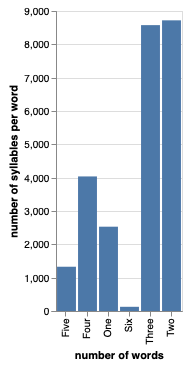

In [11]:
syllabified_words = []
number_of_sylls = []

for d in full.values():
    syllabified_words.append(d['syllabified'])

for item in syllabified_words:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    number_of_sylls.append(cnt)

#print(syllabified_words)
#print(number_of_sylls)

print('One-syll words in full dataset:', number_of_sylls.count(1))
print('Two-syll words in full dataset:', number_of_sylls.count(2))
print('Three-syll words in full dataset:', number_of_sylls.count(3))
print('Four-syll words in full dataset:', number_of_sylls.count(4))
print('Five-syll words in full dataset:', number_of_sylls.count(5))
print('Six-syll words in full dataset:', number_of_sylls.count(6))
print('Seven-syll words in full dataset:', number_of_sylls.count(7))


source = pd.DataFrame({
    'number of words': ['One', 'Two', 'Three', 'Four', 'Five', 'Six'],
    'number of syllables per word': [number_of_sylls.count(1), number_of_sylls.count(2),
          number_of_sylls.count(3), number_of_sylls.count(4), 
          number_of_sylls.count(5), number_of_sylls.count(6)]
})

chart = alt.Chart(source).mark_bar().encode(
    x='number of words',
    y='number of syllables per word'
)

chart

#### Loading gold and silver datasets for evaluation

In [4]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold = [value["syllabified"] for value in gold]
items_silver = [value["syllabified"] for value in silver]

#### Convert to dataframes

In [5]:
df_gold = pd.DataFrame(value["syllabified"] for value in gold)
df_gold = df_gold.rename(index=str, columns={0: "gold_syllabification"})
#print(df_gold.head())
print('Total number of words in gold:', len(df_gold))

df_silver = pd.DataFrame(value["syllabified"] for value in silver)
df_silver = df_silver.rename(index=str, columns={0: "silver_syllabification"})
#print(df_silver.head())
print('Total number of words in silver:', len(df_silver))

Total number of words in gold: 2532
Total number of words in silver: 2532


#### General comparison between gold and silver dataframes

In [6]:
diff_keys = set(items_silver) ^ set(items_gold)
print('Mistakes are made against the syllabification these words:', diff_keys)

Mistakes are made against the syllabification these words: {'ve-nusti-aen', 'ber-roet', 'blanc-har-diin', 'me-tho-do-ti-us', 'me-ne-ger-ley-e', 'on-bes-mit', 'bispe-le', 'ont-er-vet', 'voer-dien', 'pro-phe-ten', 'na-a-man', 'ghe-dyen', 'ex-al-ta-bi-tur', 'e-xal-ta-bi-tur', 'comp-len-den', 'jo-su-e', 'door-luch-tichs-ten', 'vter-pan-dra-goen', 'geu-loen', 'hen-dri-ke', 'o-ne-re', 'au-rel-iaen', 'voer-di-en', 'cont-ri-ci-o', 'prophe-ten', 'me-ne-ger-le-ye', 'mes-pra-ke', 'blisca-pen', 'mon-tes-claer', 'ghein-for-meert', 'hue-sc-hei-de', 'on-ter-vet', 'ga-lie-ne', 'verdwe-relt', 'ver-dwe-relt', 'blijs-ca-pen', 'grey-e', 'mo-ghendt-he-den', 'pa-ijn', 'mi-cha-el', 'gheeraer-de', 'blis-cap', 'on-be-smit', 'com-plen-den', 'ghee-raer-de', 'in-glant', 'he-me-ly-oe-ne', 'mo-ghend-he-de', 'on-e-re', 'ge-bo-rent-he-de', 'mon-te-sclaer', 's-ne', 'ges-maect', 'ne-u-fra-des', 'om-be-smit', 'door-luch-tich-sten', 'mo-ghen-dthe-den', 'daer-o-me', 'sa-baoth', 'ab-dy-en', 'tra-del-ian-te', 'per-sien', 'g

In [7]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

value_counts = (result.gold_syllabification == result.silver_syllabification).value_counts()
print(value_counts)

True     2461
False      71
dtype: int64


#### Print dataframe with mistakes

In [8]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

true_false = result.set_index('correct?')
mistakes = true_false.loc[False]
mistakes

,gold_syllabification,silver_syllabification
correct?,,
False,groe-ien,groeien
False,au-be-ri-oe-ne,au-ber-ioe-ne
False,ge-uloen,geu-loen
False,e-ven-ker-stijn,e-ven-kerstijn
False,ghe-dy-en,ghe-dyen
False,ver-smaet,vers-maet
False,ge-bo-ren-the-de,ge-bo-rent-he-de
False,hen-dri-ke,hend-ri-ke
False,ex-al-ta-bi-tur,e-xal-ta-bi-tur


#### Expand dataframe with information about syllable counts

In [9]:
num_sylls_gold = []
num_sylls_silver = []


for item in items_gold:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_gold.append(cnt)


for item in items_silver:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_silver.append(cnt)
    
# Make df's

df_gold_syll_count = pd.DataFrame(num_sylls_gold)
df_gold_syll_count = df_gold_syll_count.rename(index=str, columns={0: "num_sylls_gold"})

df_silver_syll_count = pd.DataFrame(num_sylls_silver)
df_silver_syll_count = df_silver_syll_count.rename(index=str, columns={0: "num_sylls_silver"})

result_sylls = pd.concat([df_gold_syll_count, df_gold, df_silver_syll_count, df_silver], axis=1)

result_sylls['correct?'] = (df_gold_syll_count['num_sylls_gold'] == df_silver_syll_count['num_sylls_silver'])

x = result_sylls.set_index('correct?')
mistakes_number_of_sylls = x.loc[False]
mistakes_number_of_sylls
#print(mistakes_number_of_sylls)
print('Incorrect predictions about the number of syllables in a word:', len(mistakes_number_of_sylls), '(out of a total of', len(items_gold), 'words).')

Incorrect predictions about the number of syllables in a word: 42 (out of a total of 2532 words).


#### Calculate accuracy for mono- and polysyllable words

In [10]:
cnt_1syllable_words = 0
cnt_2syllable_words = 0
cnt_3syllable_words = 0
cnt_4syllable_words = 0
cnt_5syllable_words = 0
cnt_6syllable_words = 0
cnt_7syllable_words = 0


for item in items_gold:
    num_syl_word = item.split("-")
    if len(num_syl_word) == 1:
        cnt_1syllable_words += 1
    elif len(num_syl_word) == 2:
        cnt_2syllable_words += 1
    elif len(num_syl_word) == 3:
        cnt_3syllable_words += 1
    elif len(num_syl_word) == 4:
        cnt_4syllable_words += 1
    elif len(num_syl_word) == 5:
        cnt_5syllable_words += 1
    elif len(num_syl_word) == 6:
        cnt_6syllable_words += 1
    elif len(num_syl_word) == 7:
        cnt_7syllable_words += 1
        

cnt_1syllable_words_mistakes = 0
cnt_2syllable_words_mistakes = 0
cnt_3syllable_words_mistakes = 0
cnt_4syllable_words_mistakes = 0
cnt_5syllable_words_mistakes = 0
cnt_6syllable_words_mistakes = 0
cnt_7syllable_words_mistakes = 0


if len(num_sylls_gold) == len(num_sylls_silver):
    for i in range(len(num_sylls_gold)):
        if num_sylls_gold[i] == 1 and num_sylls_silver[i] != 1:
            cnt_1syllable_words_mistakes += 1
        if num_sylls_gold[i] == 2 and num_sylls_silver[i] != 2:
            cnt_2syllable_words_mistakes += 1
        if num_sylls_gold[i] == 3 and num_sylls_silver[i] != 3:
            cnt_3syllable_words_mistakes += 1
        if num_sylls_gold[i] == 4 and num_sylls_silver[i] != 4:
            cnt_4syllable_words_mistakes += 1
        if num_sylls_gold[i] == 5 and num_sylls_silver[i] != 5:
            cnt_5syllable_words_mistakes += 1
        if num_sylls_gold[i] == 6 and num_sylls_silver[i] != 6:
            cnt_6syllable_words_mistakes += 1
        if num_sylls_gold[i] == 7 and num_sylls_silver[i] != 7:
            cnt_7syllable_words_mistakes += 1

print('Total number of 1syllabic words:', cnt_1syllable_words, 'Mistakes:', cnt_1syllable_words_mistakes)
print('Total number of 2syllabic words:', cnt_2syllable_words, 'Mistakes:', cnt_2syllable_words_mistakes)
print('Total number of 3syllabic words:', cnt_3syllable_words, 'Mistakes:', cnt_3syllable_words_mistakes)
print('Total number of 4syllabic words:', cnt_4syllable_words, 'Mistakes:', cnt_4syllable_words_mistakes)
print('Total number of 5syllabic words:', cnt_5syllable_words, 'Mistakes:', cnt_5syllable_words_mistakes)
print('Total number of 6syllabic words:', cnt_6syllable_words, 'Mistakes:', cnt_6syllable_words_mistakes)
print('Total number of 7syllabic words:', cnt_7syllable_words, 'Mistakes:', cnt_7syllable_words_mistakes)    

try:
            
    print('Accuracy syllabification of one-syllable words:', float(100-cnt_1syllable_words_mistakes/cnt_1syllable_words))
    print('Accuracy syllabification of two-syllable words:', float(100-cnt_2syllable_words_mistakes/cnt_2syllable_words))
    print('Accuracy syllabification of three-syllable words:', float(100-cnt_3syllable_words_mistakes/cnt_3syllable_words))
    print('Accuracy syllabification of four-syllable words:', float(100-cnt_4syllable_words_mistakes/cnt_4syllable_words))
    print('Accuracy syllabification of five-syllable words:', float(100-cnt_5syllable_words_mistakes/cnt_5syllable_words))
    print('Accuracy syllabification of six-syllable words:', float(100-cnt_6syllable_words_mistakes/cnt_6syllable_words))
    print('Accuracy syllabification of seven-syllable words:', float(100-cnt_7syllable_words_mistakes/cnt_7syllable_words))

except ZeroDivisionError:
    print("You can't divide by zero!")

Total number of 1syllabic words: 244 Mistakes: 1
Total number of 2syllabic words: 905 Mistakes: 12
Total number of 3syllabic words: 825 Mistakes: 18
Total number of 4syllabic words: 417 Mistakes: 7
Total number of 5syllabic words: 132 Mistakes: 4
Total number of 6syllabic words: 9 Mistakes: 0
Total number of 7syllabic words: 0 Mistakes: 0
Accuracy syllabification of one-syllable words: 99.99590163934427
Accuracy syllabification of two-syllable words: 99.98674033149172
Accuracy syllabification of three-syllable words: 99.97818181818182
Accuracy syllabification of four-syllable words: 99.9832134292566
Accuracy syllabification of five-syllable words: 99.96969696969697
Accuracy syllabification of six-syllable words: 100.0
You can't divide by zero!
